#  CODSOFT INTERNSHIP

**TASK-3: IRIS FLOWER CLASSIFICATION**

***Author: GARIKAPUDI MAHESH***

**Domain:Data Science**

**Batch: October B58**
   




---






## AIM

   To develop and train a supervised machine learning classification model using the Iris dataset's sepal and petal measurements (length and width) that can accurately predict and classify an Iris flower into one of its three respective species: Iris setosa, Iris versicolor, or Iris virginica.








In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
from google.colab import files
uploaded=files.upload()

Saving IRIS.csv to IRIS.csv


In [5]:
import io
iris=pd.read_csv((io.BytesIO(uploaded['IRIS.csv'])))

In [6]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
iris.shape

(150, 5)

In [8]:
iris.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
le=LabelEncoder()

In [13]:
for col in iris.columns:
  if not is_numeric_dtype(iris[col]):
    iris[col]=le.fit_transform(iris[col])

In [14]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


/tmp/ipython-input-989662873.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species',data=iris,palette='Set2')


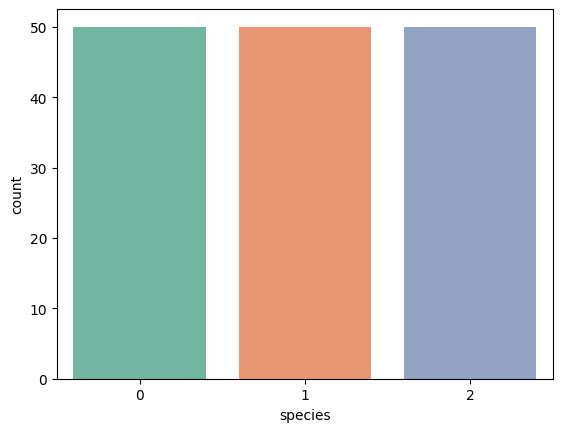

In [15]:
sns.countplot(x='species',data=iris,palette='Set2')
plt.show()

<Axes: xlabel='sepal_length', ylabel='Count'>

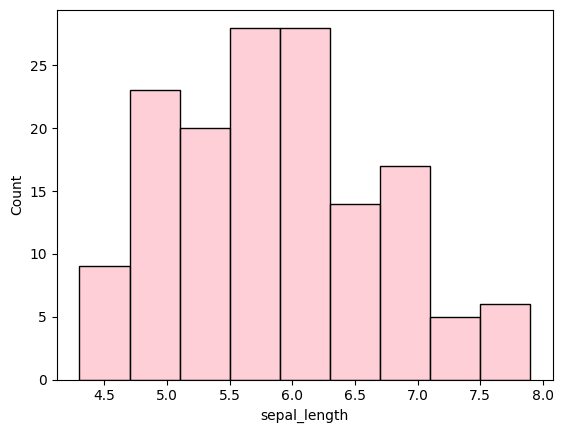

In [16]:
sns.histplot(data=iris,x=iris.sepal_length,color='pink')

<Axes: xlabel='sepal_width', ylabel='Count'>

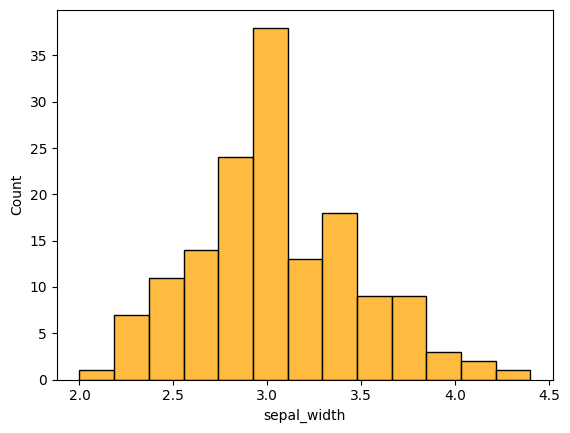

In [18]:
sns.histplot(data=iris,x=iris.sepal_width,color='orange')

<Axes: xlabel='petal_length', ylabel='Count'>

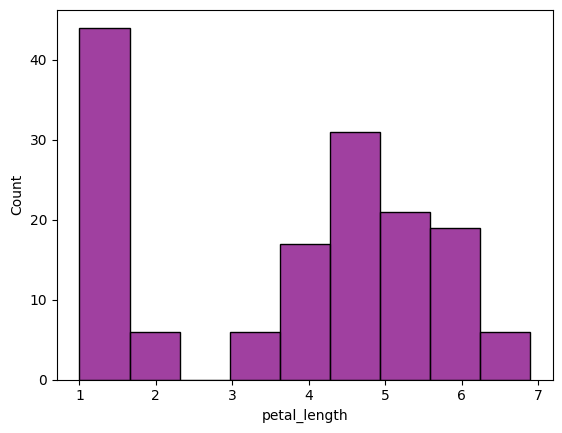

In [19]:
sns.histplot(data=iris,x=iris.petal_length,color='purple')

<Axes: xlabel='petal_width', ylabel='Count'>

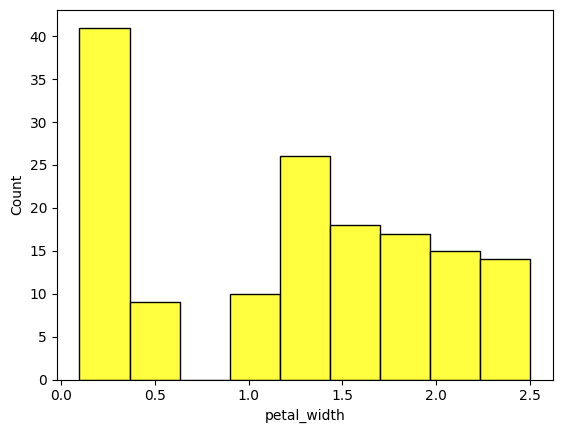

In [20]:
sns.histplot(data=iris,x=iris.petal_width,color='yellow')

<Axes: >

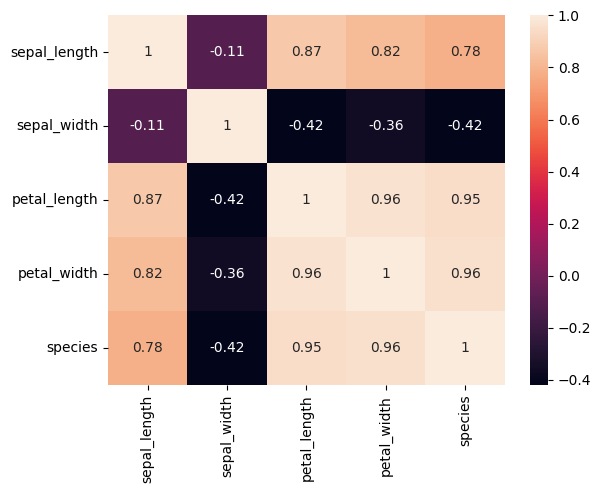

In [22]:
corr=iris.corr()
sns.heatmap(corr,annot=True)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [25]:
x=iris.drop(['species'],axis=1)
y=iris.species

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Model=LogisticRegression()
Model.fit(x_train_scaled,y_train)

LogisticRegression()

In [30]:
print('Score for Train data',Model.score(x_train_scaled,y_train))
print('Score for Test data',Model.score(x_test_scaled,y_test))

Score for Train data 0.9714285714285714
Score for Test data 0.9333333333333333


In [31]:
from sklearn.ensemble import RandomForestClassifier
Model2=RandomForestClassifier(n_estimators=100,random_state=100)
Model2.fit(x_train,y_train)

RandomForestClassifier(random_state=100)

In [32]:
print('Score for Train data',Model2.score(x_train,y_train))
print('Score for Test data',Model2.score(x_test,y_test))

Score for Train data 1.0
Score for Test data 0.9555555555555556


In [33]:
from sklearn.neighbors import KNeighborsClassifier
Model3=KNeighborsClassifier()
Model3.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
print('Score for Train data',Model3.score(x_train,y_train))
print('Score for Test data',Model3.score(x_test,y_test))

Score for Train data 0.9904761904761905
Score for Test data 0.9555555555555556


In [35]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
data={'sepal_length':[5.2],'sepal_width':[3.6],'petal_length':[1.4],'petal_width':[0.2]}
trail=pd.DataFrame(data)

In [37]:
result=Model.predict(trail)
print("Result Species:",result[0])

Result Species: 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
